In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Loading and pre-processing images

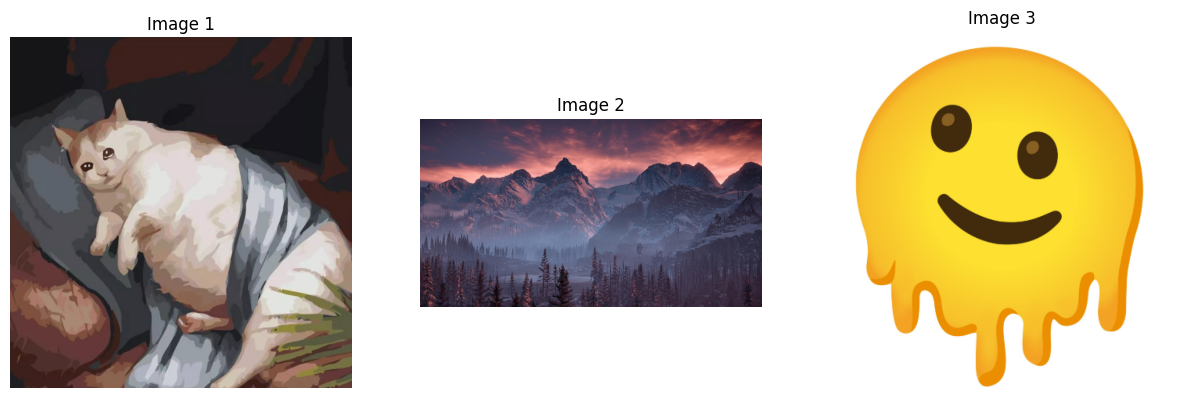

In [15]:
# 1.a.i - Load multiple images from GitHub for processing

urls = [
    'https://raw.githubusercontent.com/drnyuta/computer-vision/lab1/cat.png',
    'https://raw.githubusercontent.com/drnyuta/computer-vision/lab1/mountain.png',
    'https://raw.githubusercontent.com/drnyuta/computer-vision/lab1/emoji.png'
]

def load_image_from_url(url):
    resp = urllib.request.urlopen(url) # downloading the file from the URL
    image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8) # converting the bytes into a NumPy array
    img = cv2.imdecode(image_array, cv2.IMREAD_COLOR) # decoding the image array into OpenCV format (BGR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converting BGR to RGB (for matplotlib display)
    return img_rgb

images = [load_image_from_url(url) for url in urls]

# Display all images
plt.figure(figsize=(15,5))
for i, img in enumerate(images):
    plt.subplot(1,3,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')
plt.show()


Image 1 Grayscale Conversion


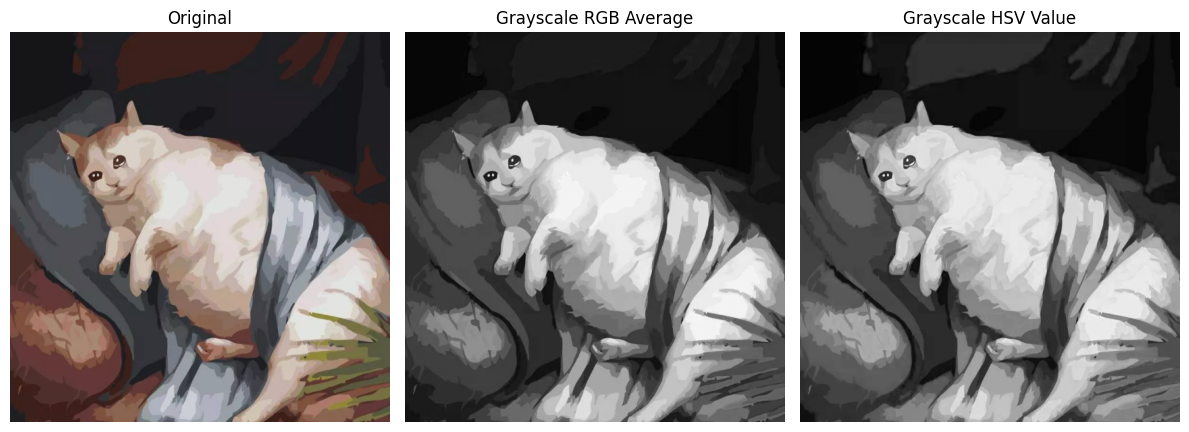


Image 2 Grayscale Conversion


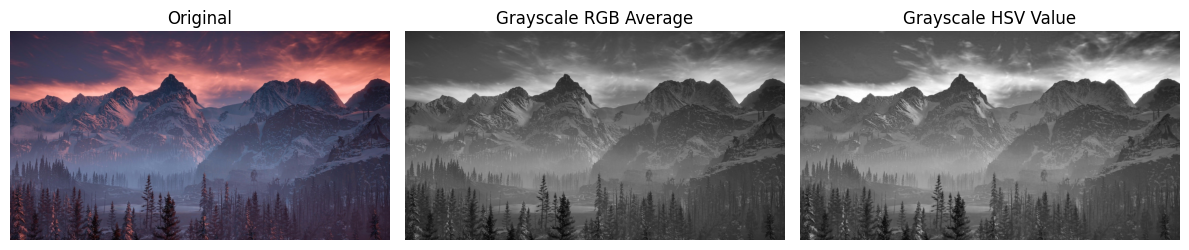


Image 3 Grayscale Conversion


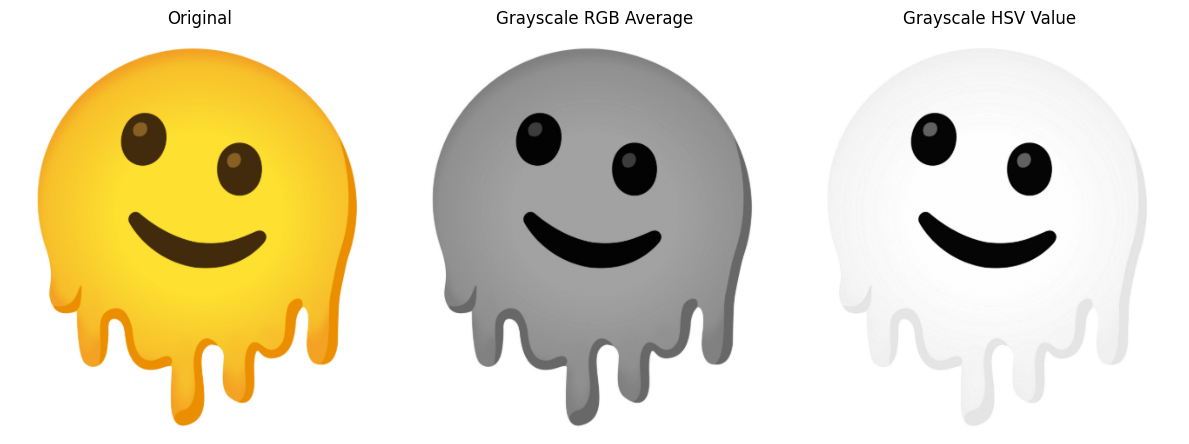

In [16]:
# 1.a.ii - Convert images to grayscale

for idx, img in enumerate(images):
    print(f"\nImage {idx+1} Grayscale Conversion")

    # Method 1: Averages the R, G, and B values to obtain a grayscale value.
    gray_avg = np.mean(img, axis=2).astype(np.uint8)

    # Method 2: Converts to HSV and uses the Value (brightness) as the grayscale value.
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)  # Convert RGB to HSV
    gray_hsv = img_hsv[:, :, 2]                     # Take the V channel (brightness)

    # Display results
    plt.figure(figsize=(12,5))

    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(gray_avg, cmap='gray')
    plt.title("Grayscale RGB Average")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(gray_hsv, cmap='gray')
    plt.title("Grayscale HSV Value")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Two grayscale methods were compared:**

1. RGB Averaging (simple mean of R, G, B channels)

2. HSV Value Channel (brightness component of HSV model)

**Results:**

In most images, both methods produced similar grayscale tones.

For the emoji image (originally bright yellow), the difference was more visible:

* Average RGB produced a medium gray,

* HSV Value gave a much lighter tone (almost white), since yellow has high brightness in HSV.

**Conclusion:** HSV better preserves perceived brightness, but RGB average may look more balanced for highly saturated colors.


Image 1 Binarization


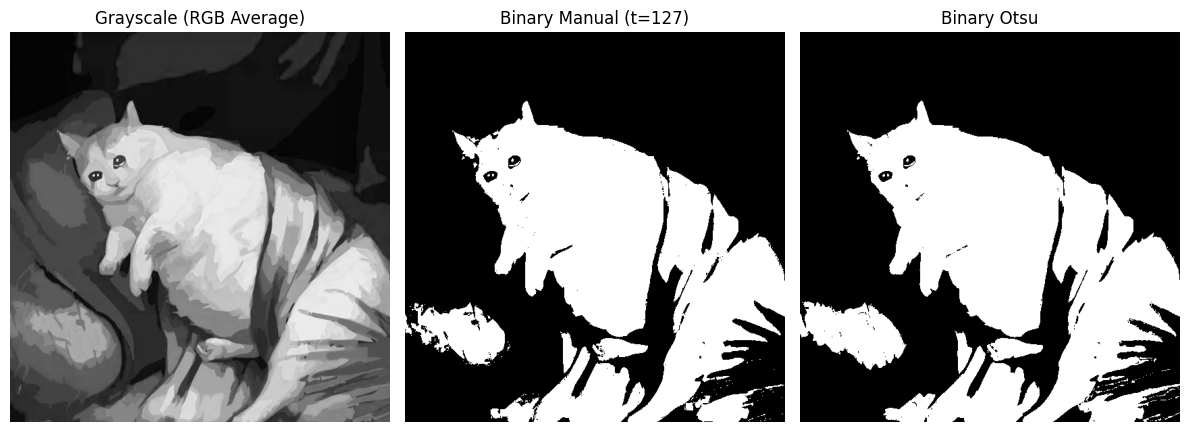


Image 2 Binarization


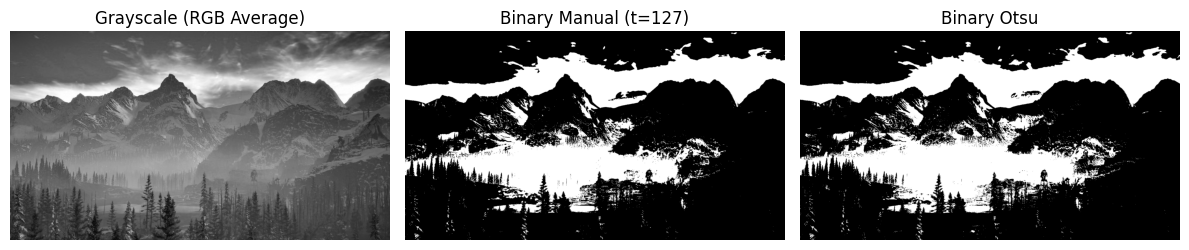


Image 3 Binarization


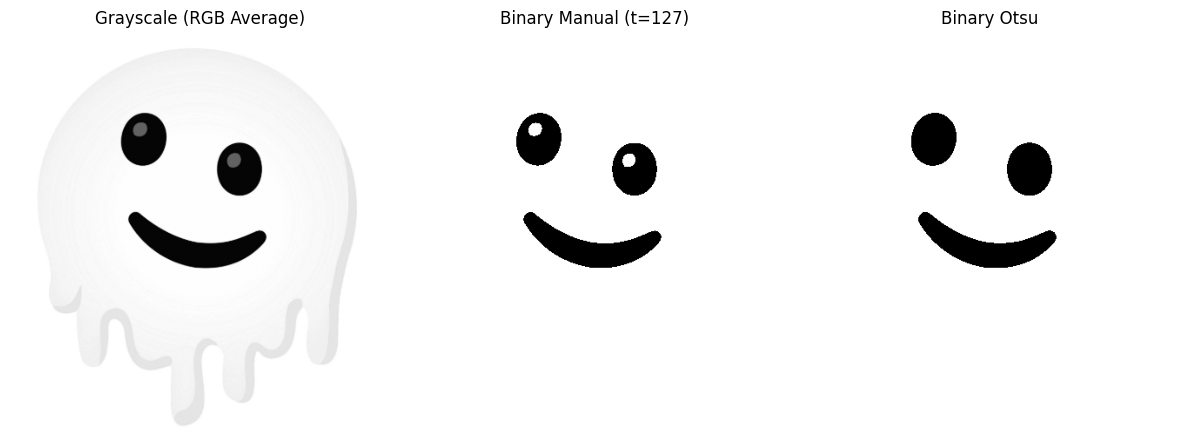

In [17]:
# 1.a.iii — Binarization (manual threshold + Otsu)

for idx, img in enumerate(images):
    print(f"\nImage {idx+1} Binarization")

    # Converting to grayscale
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    gray = img_hsv[:, :, 2]

    # 1. Manual thresholding
    threshold_value = 127
    _, binary_manual = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

    # 2. Otsu's thresholding
    _, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 3. Display results
    plt.figure(figsize=(12,5))

    plt.subplot(1,3,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale (RGB Average)")
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(binary_manual, cmap='gray')
    plt.title(f"Binary Manual (t={threshold_value})")
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(binary_otsu, cmap='gray')
    plt.title("Binary Otsu")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

Manual thresholding and Otsu’s method were applied on grayscale images.

**Results:**

1. For natural images, both methods performed similarly: shadows and soft gradients were lost, which is expected after thresholding.

2. For the emoji image, differences between grayscale sources became clear:

    * With HSV grayscale, bright highlights in the eyes turned black,

    * With RGB averaging, highlights stayed white, preserving the original look.

**Conclusion:** The binarization result depends strongly on the chosen grayscale method. The RGB average approach often keeps small bright details better, especially on high-contrast, flat-color images like the emoji.


Image 1 Histogram Operations


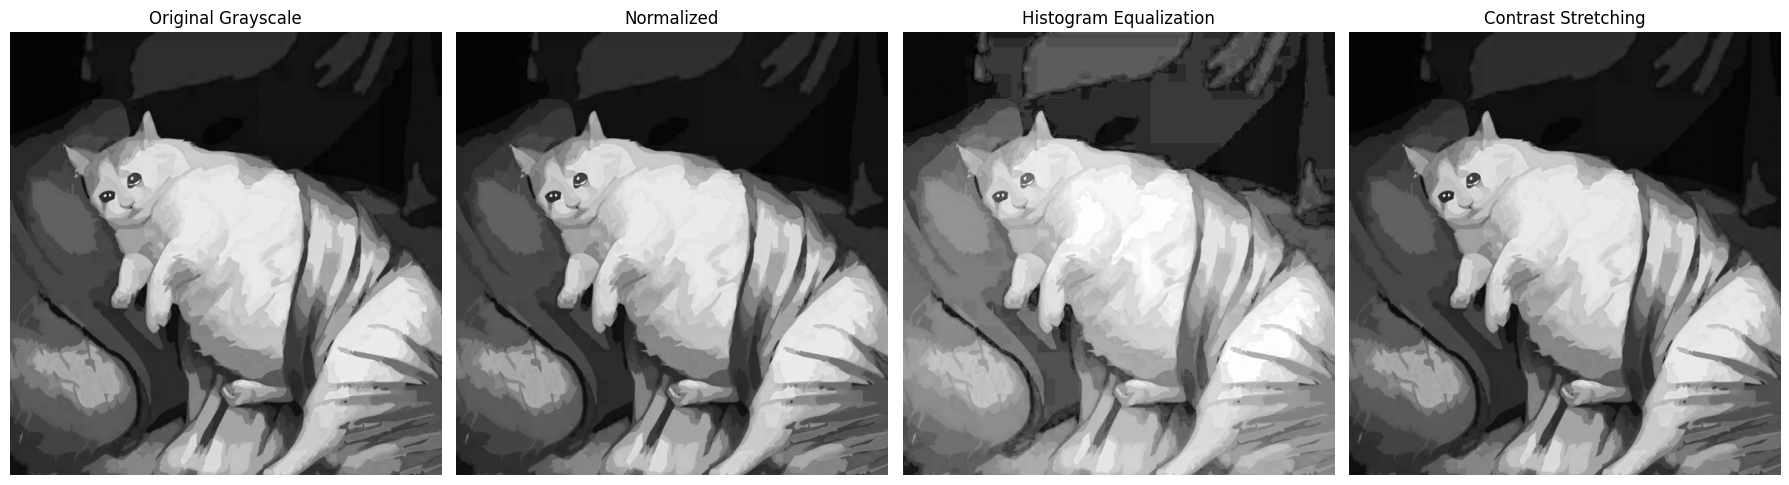


Image 2 Histogram Operations


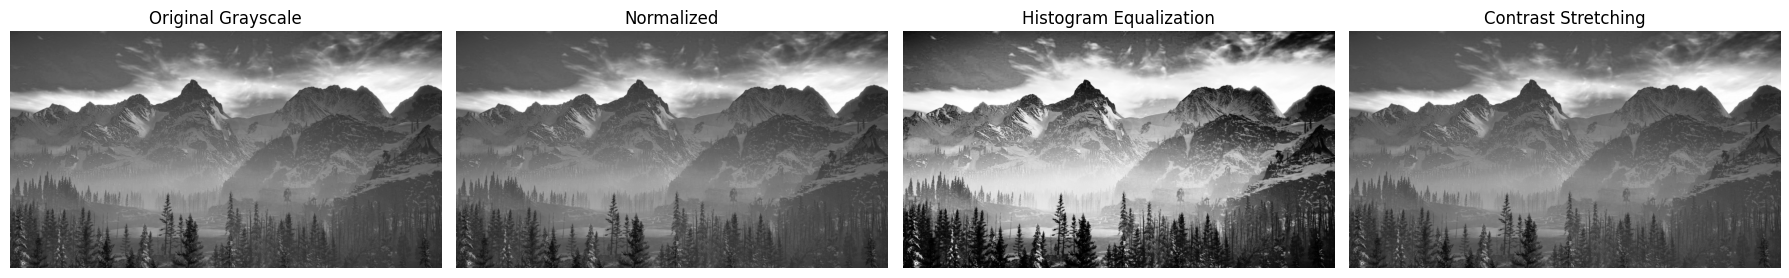


Image 3 Histogram Operations


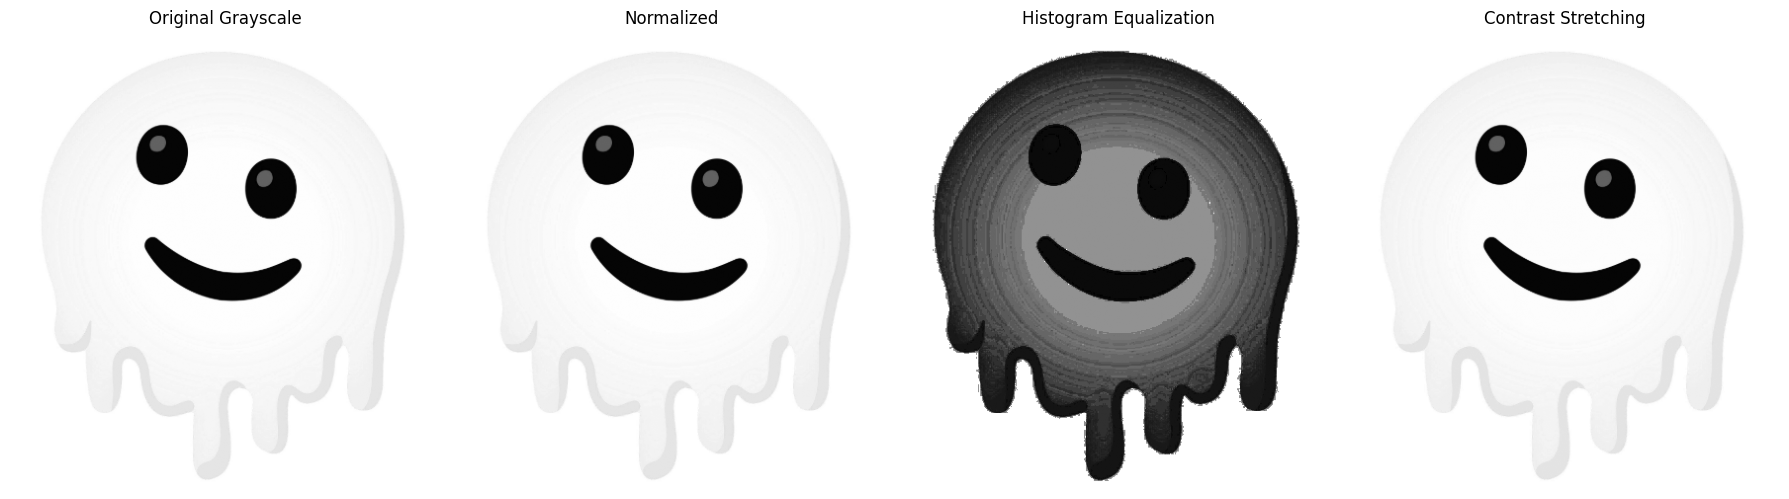

In [18]:
# 1.a.iv — Normalization, Equalization, Contrast Stretching

for idx, img in enumerate(images):
    print(f"\nImage {idx+1} Histogram Operations")

    # Converting to grayscale
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    gray = img_hsv[:, :, 2]

    # 1. Normalization to full 0-255 range
    norm_img = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

    # 2. Histogram equalization
    equalized_img = cv2.equalizeHist(gray)

    # 3. Contrast stretching (manual)
    min_val, max_val = np.min(gray), np.max(gray)
    stretched_img = ((gray - min_val) * (255.0 / (max_val - min_val))).astype(np.uint8)

    # 4. Display results
    plt.figure(figsize=(18,5))

    plt.subplot(1,4,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Grayscale")
    plt.axis('off')

    plt.subplot(1,4,2)
    plt.imshow(norm_img, cmap='gray')
    plt.title("Normalized")
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(equalized_img, cmap='gray')
    plt.title("Histogram Equalization")
    plt.axis('off')

    plt.subplot(1,4,4)
    plt.imshow(stretched_img, cmap='gray')
    plt.title("Contrast Stretching")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Explanations & Results**

Grayscale images were processed using three techniques to enhance visual quality:

1. Normalization — stretches pixel values to the full 0–255 range.

    * For most of images, little change was observed because the original images already had a wide range of brightness.

    * For flat images (e.g., emoji), normalization can help reveal subtle differences.

2. Histogram Equalization — redistributes brightness values to make the histogram more uniform.

    * This improves global contrast and enhances details.

    * For the emoji image, equalization made the features more distinct and revealed more brightness levels (more “colors” in grayscale).

3. Contrast Stretching — manually scales pixel values based on the original min/max.

    * Particularly effective for flat or low-contrast images like emoji.

    * Makes features stand out more clearly.

# Convolution operations


Image 1 Convolution Operations


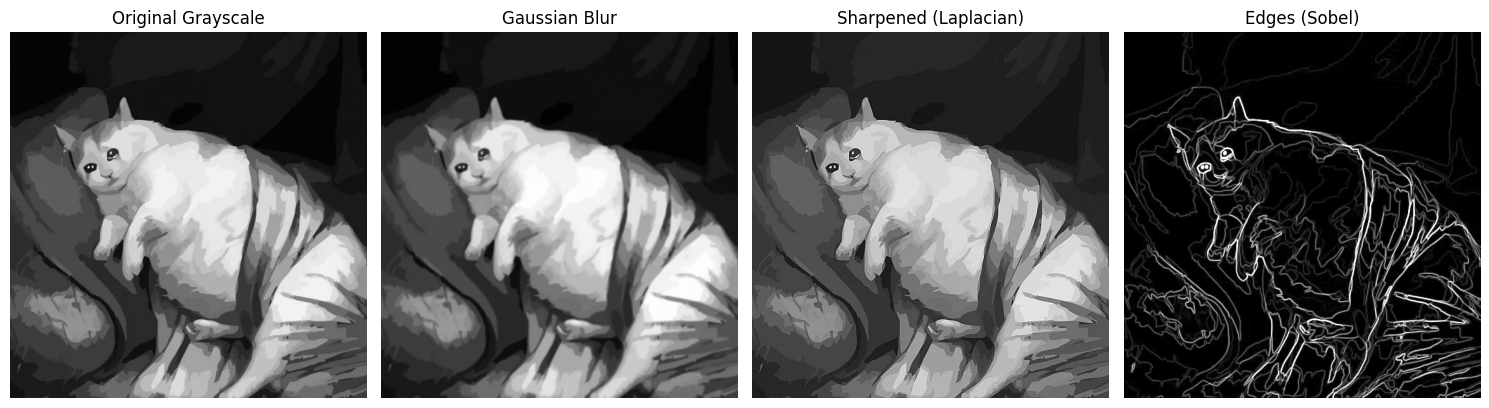


Image 2 Convolution Operations


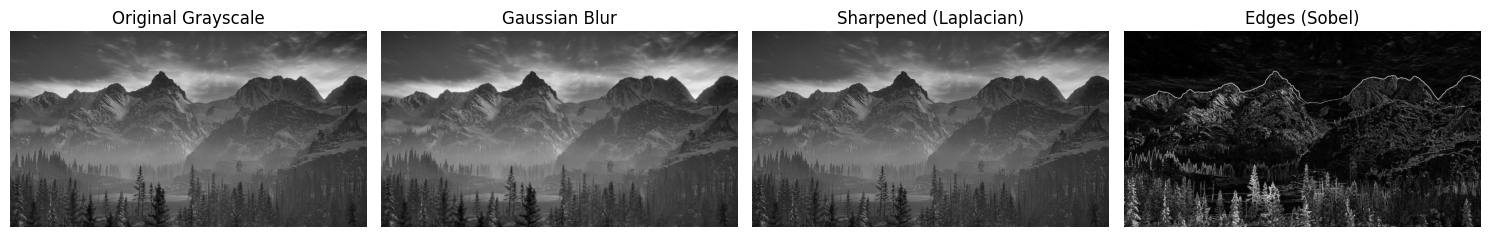


Image 3 Convolution Operations


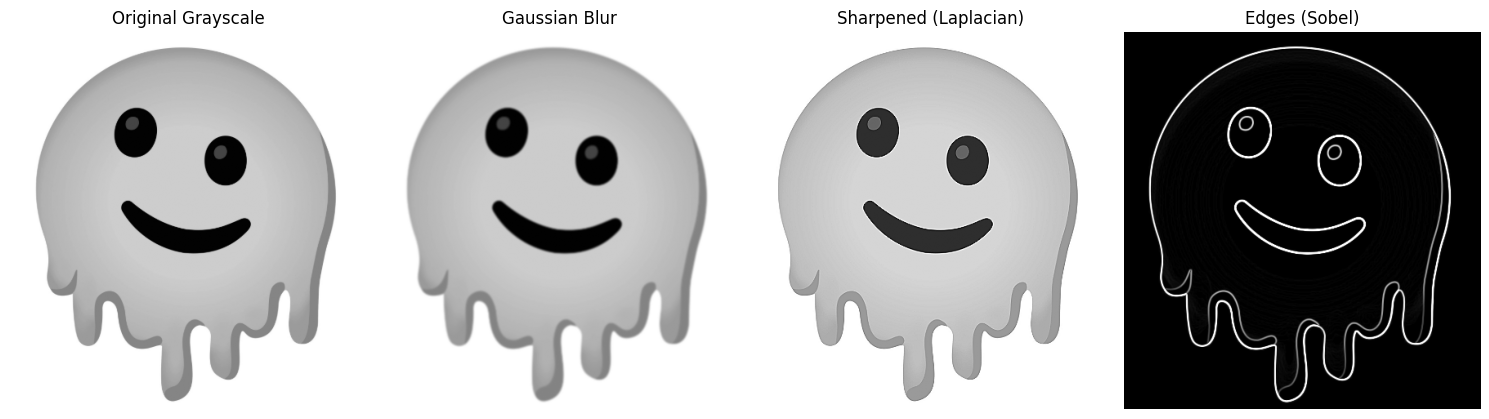

In [19]:
# 1.b.i — Convolution Operations (Blurring, Sharpening, Edge Detection)

for idx, img in enumerate(images):
    print(f"\nImage {idx+1} Convolution Operations")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 1. Gaussian Blur
    # Applies Gaussian smoothing to reduce noise and detail
    # Kernel size (5x5) controls the level of smoothing
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # 2. Sharpening (Laplacian)
    # Laplacian operator detects edges (areas of rapid intensity change)
    # Subtracting a fraction of the Laplacian from the original image enhances sharpness
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    sharp = cv2.convertScaleAbs(gray - 0.5 * laplacian)

    # 3. Edge Detection (Sobel
    # Sobel operator calculates gradients in horizontal (X) and vertical (Y) directions
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

    # Combine X and Y gradients using magnitude
    sobel_combined = cv2.magnitude(sobel_x, sobel_y)
    sobel_combined = cv2.convertScaleAbs(sobel_combined)

    # 4. Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(blurred, cmap='gray')
    plt.title('Gaussian Blur')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(sharp, cmap='gray')
    plt.title('Sharpened (Laplacian)')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(sobel_combined, cmap='gray')
    plt.title('Edges (Sobel)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


**1. Gaussian Blur**
* This filter smooths the image and removes noise by averaging nearby pixels with Gaussian weights.
Pixels closer to the center have more weight, so the result becomes softer.
It helps reduce noise and small details but may slightly blur edges.

**2. Sharpening (Laplacian)**
* The Laplacian operator detects areas with strong intensity change (edges).
By subtracting a fraction of this edge map from the original image, we make edges more pronounced.

* As a result, fine details and textures appear clearer, but noise and rough edges can also become stronger.

**3. Sobel Edge Detection**
* The Sobel operator measures brightness changes horizontally and vertically.
It combines both directions to create a map of edges.
This highlights object outlines and boundaries, especially in images with clean contrasts.

**Results**

1. All three filters worked correctly on all images.

2. Gaussian Blur — smoothed textures and reduced noise; emoji became softer, natural images slightly lost fine details.

3. Sharpening — made edges and textures clearer; on the cat image, background brush strokes became more visible, which is not always desirable.

4. Sobel Edge Detection — performed best on the 2D emoji, producing clean outlines.
On complex natural images (mountain, cat), Sobel detected too many small edges due to shadows and textures, making contours less clear.

# Geometric transformations


Image 1 Geometric Transformations


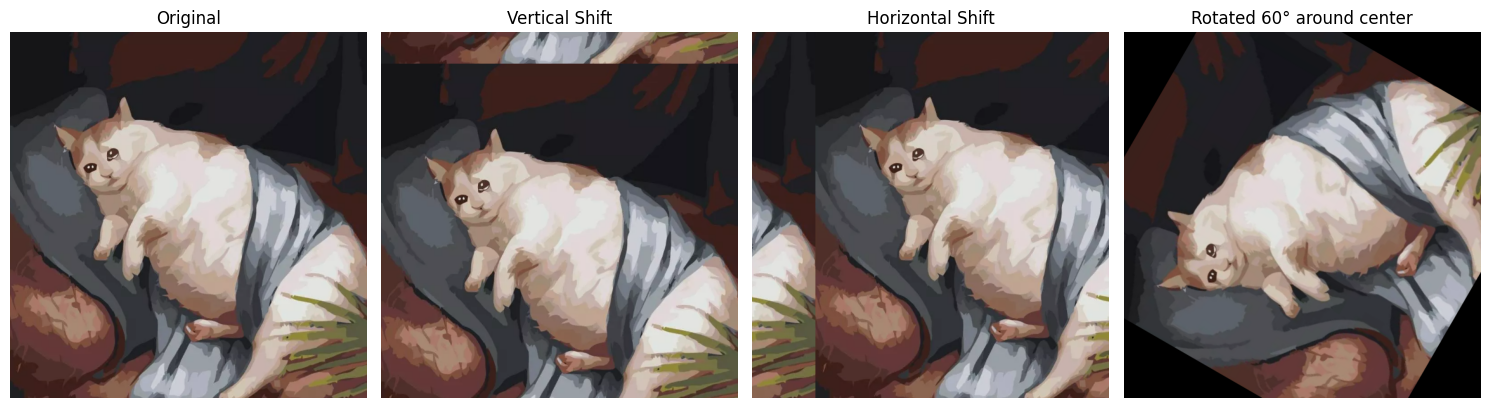


Image 2 Geometric Transformations


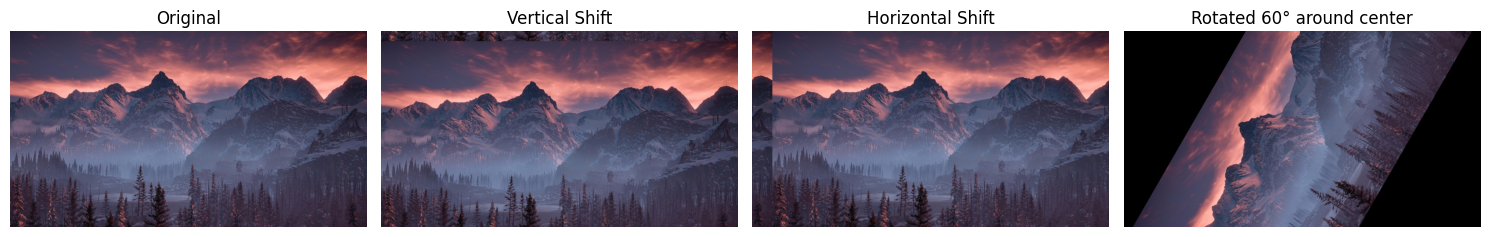


Image 3 Geometric Transformations


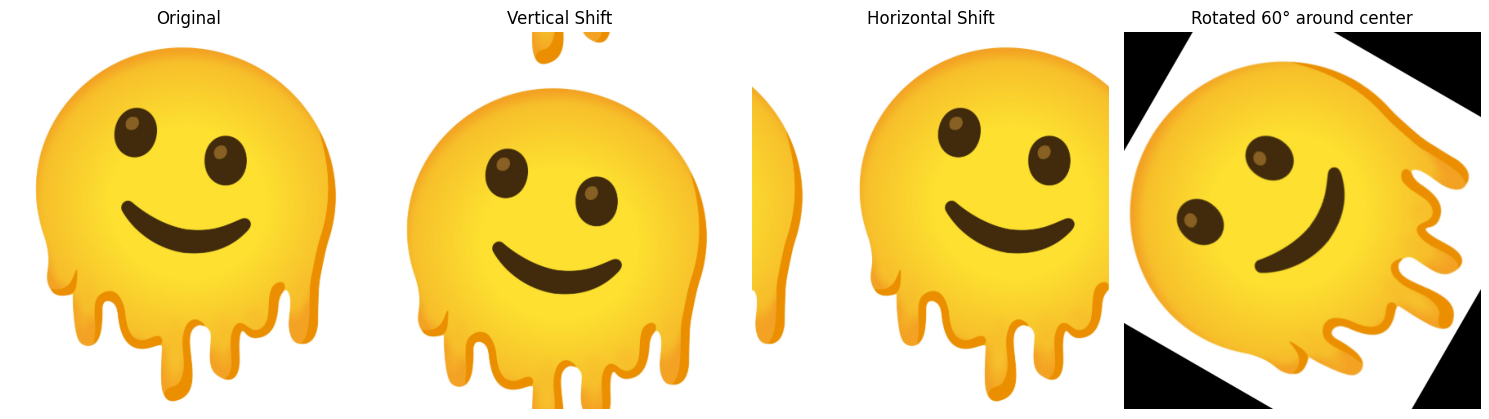

In [21]:
# 1.c — Geometric Transformations

for idx, img in enumerate(images):
    print(f"\nImage {idx+1} Geometric Transformations")

    h, w = img.shape[:2]  # image height and width

    # 1. Cyclic Shift (Roll)

    # shifting pixels horizontally by dx and vertically by dy
    dx, dy = 100, 50
    shifted_h = np.roll(img, shift=dy, axis=0)  # vertical shift
    shifted_v = np.roll(img, shift=dx, axis=1)  # horizontal shift

    # 2. Rotation Around Custom Center
    center = (w // 2, h // 2) # here center - middle of the image
    angle = 60  # degrees
    scale = 1.0

    # getting the rotation matrix
    rot_matrix = cv2.getRotationMatrix2D(center, angle, scale)

    # applying rotation
    rotated = cv2.warpAffine(img, rot_matrix, (w, h))

    # 3. Display results
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(shifted_h)
    plt.title('Vertical Shift')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(shifted_v)
    plt.title('Horizontal Shift')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(rotated)
    plt.title(f'Rotated {angle}° around center')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

**Explanations & Results**

1. Cyclic Shift (Roll)
    * Moves all pixels horizontally or vertically by a fixed number of positions.
    * Pixels that move outside the border are wrapped around to the opposite side (like a loop).
    * This is done using np.roll, which performs the shift efficiently without losing data.

2. Rotation (Around Custom Center)
    * Rotates the image by a chosen angle around any point (usually the center).
    * The transformation is calculated using a rotation matrix (cv2.getRotationMatrix2D),
and applied with cv2.warpAffine, which maps pixels to new rotated positions.
    * The scale parameter controls resizing during rotation.

**Results**

1. Cyclic Shift:
    * All images shifted correctly both horizontally and vertically.
    * Because of cyclic wrapping, parts of the image reappear on the opposite side, creating a seamless loop effect.

2. Rotation:
    * All images were rotated around their centers.
    * Background areas outside the rotated region appear black (default fill).
    * Works better for objects centered in the image (like the emoji).
    * On detailed images (cat, mountain), rotation may slightly cut corners due to rectangular output.